In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt


### Q1: Using the sales.csv Download sales.csv, write code to show effects of interactions, if any, on the linear regression model to predict the total_sales for a new area using given sales from three areas.

In [2]:
Q1_Data = pd.read_csv('/Users/HuixinLi/Desktop/452 ML/HW 2/sales.csv')
Q1_Data.head()

,Unnamed: 0,area1_sales,area2_sales,area3_sales,total_sales
0,1000,0.79,0.80,0.02,1.75
1,1001,0.83,0.08,0.18,1.75
2,1002,0.85,0.01,0.22,1.75
3,1003,1.25,0.00,0.03,1.75
4,1004,0.72,0.04,0.10,1.74


In [3]:
Q1_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   3000 non-null   int64  
 1   area1_sales  3000 non-null   float64
 2   area2_sales  3000 non-null   float64
 3   area3_sales  3000 non-null   float64
 4   total_sales  3000 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 117.3 KB


In [4]:
Q1_Data.isnull().sum()
len(Q1_Data)

3000

In [5]:
x1 = Q1_Data[['area1_sales', 'area2_sales', 'area3_sales']]
y1 = Q1_Data['total_sales' ]

# train the dataset
x1_train , x1_test , y1_train , y1_test = train_test_split(x1, y1, test_size= 0.25 , random_state=42)

In [7]:
reg1 = LinearRegression()
Val2 = reg1.fit(x1_train,y1_train)

#formula1 = 'total_sales ~ area1_sales+area2_sales+area3_sales'
#model1 = sm.OLS.from_formula(formula1, result)
#result1test = model1.fit()

print(reg1.score(x1_test,y1_test))
print(reg1.intercept_)
print(reg1.coef_)

print('R2 value for the model without interaction is ' + str(explained_variance_score(y1_test,reg1.predict(x1_test)))) 


0.6920762767467351
0.25219200910086814
[0.90699714 0.74912358 1.84274766]
R2 value for the model without interaction is 0.6920986138609464


In [8]:
# Combining the data for passing it into linear regression model with interaction
result = pd.concat([x1_train, y1_train], axis=1)
formula1 = 'total_sales ~ area1_sales*area2_sales*area3_sales'
model1 = sm.OLS.from_formula(formula1, result)
result1 = model1.fit()
print(result1.summary())


                            OLS Regression Results                            
Dep. Variable:            total_sales   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     805.3
Date:                Sun, 22 Jan 2023   Prob (F-statistic):               0.00
Time:                        18:03:32   Log-Likelihood:                 638.79
No. Observations:                2250   AIC:                            -1262.
Df Residuals:                    2242   BIC:                            -1216.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [9]:
result1.predict(x1_test)
print(explained_variance_score(y1_test,result1.predict(x1_test))) 

0.7092448918560145


#### Comparing the two out of sample R2 values: 0.69 without interaction variables and 0.71 with interactions variables, we think that interactions should be included because they added some explantory value, and interactions like area1* area3, area1* area2* area3 are significant at any significance level, area1* area2 is significant at 1% significance level.

### Q2: Develop a full Logistic Regression Model using customer.csv Download customer.csvto predict whether the customer will purchase the product. Also train trimmed logistic regression models (Trimmed over features in the data). Compute the "in-sample R2" (pseudo) for the models you train and compare the models based on this metric.

In [10]:
Q2_Data = pd.read_csv('/Users/HuixinLi/Desktop/452 ML/HW 2/customer.csv')
Q2_Data.head()

len(Q2_Data[Q2_Data["Purchased"] == 1])

143

In [11]:
print(Q2_Data.isnull().sum())
print(len(Q2_Data))

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64
400


In [12]:
### Full Model With All Interaction terms ##########

formula1 = 'Purchased ~ EstimatedSalary + Age + Gender + Gender*Age + Gender * EstimatedSalary + EstimatedSalary*Age'
model2_1 = smf.glm(formula1,family=sm.families.Binomial(),data = Q2_Data)
result2_1 = model2_1.fit()
print(result2_1.summary()) # the interaction between salary and age is significant

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      393
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -105.16
Date:                Sun, 22 Jan 2023   Deviance:                       210.31
Time:                        18:11:30   Pearson chi2:                 1.09e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5407
Covariance Type:            nonrobust                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [13]:
#Pseudo R2 calculation
Val1 = 1 - (result2_1.deviance/result2_1.null_deviance)
print("Pseudo R2 value for Model 1: "+str(Val1))

Pseudo R2 value for Model 1: 0.5967759809392116


In [14]:
### Full Model Without Interaction terms ##########

formula2 = 'Purchased ~ EstimatedSalary + Age + Gender'
model2_2 = smf.glm(formula2,family=sm.families.Binomial(),data = Q2_Data)
result2_2 = model2_2.fit()
print(result2_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      396
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -137.92
Date:                Sun, 22 Jan 2023   Deviance:                       275.84
Time:                        18:12:30   Pearson chi2:                     459.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.4590
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -12.7836      1.359     

In [15]:
Val1 = 1 - (result2_2.deviance/result2_2.null_deviance)
print("Pseudo R2 value for Model 2: "+str(Val1))

Pseudo R2 value for Model 2: 0.4711320496548511


In [19]:
### Full Model With Just Salary and Age Interaction term ##########

formula3 = 'Purchased ~ EstimatedSalary + Age + Gender + EstimatedSalary*Age'
model2_3 = smf.glm(formula3,family=sm.families.Binomial(),data = Q2_Data)

result2_3 = model2_3.fit()
print(result2_3a.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      395
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -105.28
Date:                Sun, 22 Jan 2023   Deviance:                       210.56
Time:                        18:15:55   Pearson chi2:                 1.27e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5405
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -37.6865    

In [20]:
Val1 = 1 - (result2_3.deviance/result2_3.null_deviance)
print("Pseudo R2 value for Model 3: "+str(Val1))

Pseudo R2 value for Model 3: 0.5963044094947236


#### Out of the interactions variables, Interaction terms seem to have an impact on the R2 value, as the R2 value reduces significantly upon removing the interaction terms. We also see that only the interaction between Age and Estimated Salary is significant and even if we remove the other two interaction terms, there isnt much impact on overall R2 value.

In [21]:
# Trimmed Model 1

formula4 = 'Purchased ~ EstimatedSalary + Age + EstimatedSalary*Age'
model2_4 = smf.glm(formula4,family=sm.families.Binomial(),data = Q2_Data)
result2_4 = model2_4.fit()
print(result2_4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      396
Model Family:                Binomial   Df Model:                            3
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -106.78
Date:                Sun, 22 Jan 2023   Deviance:                       213.57
Time:                        18:16:33   Pearson chi2:                 1.38e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.5370
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             -36.1099    

In [22]:
Val1 = 1 - (result2_4.deviance/result2_4.null_deviance)
print("Pseudo R2 value for Model 4: "+str(Val1))

Pseudo R2 value for Model 4: 0.5905275947196518


In [23]:
# Trimmed Model 2

formula5 = 'Purchased ~  Age + Gender'
model2_5 = smf.glm(formula5,family=sm.families.Binomial(),data = Q2_Data)
result2_5 = model2_5.fit()
print(result2_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      397
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -168.07
Date:                Sun, 22 Jan 2023   Deviance:                       336.14
Time:                        18:17:51   Pearson chi2:                     395.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3710
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -8.1154      0.814     -9.

In [26]:
Val1 = 1 - (result2_5.deviance/result2_5.null_deviance)
print("Pseudo R2 value for Model 5: "+str(Val1))

Pseudo R2 value for Model 5: 0.3555239080809599


In [27]:
# Trimmed Model 3
formula6 = 'Purchased ~ EstimatedSalary + Gender'
model2_6 = smf.glm(formula6,family=sm.families.Binomial(),data = Q2_Data)
result2_6 = model2_6.fit()
print(result2_6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      397
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -233.78
Date:                Sun, 22 Jan 2023   Deviance:                       467.56
Time:                        18:18:09   Pearson chi2:                     425.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1263
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.2720      0.310     

In [28]:
Val1 = 1 - (result2_6.deviance/result2_6.null_deviance)
print("Pseudo R2 value for Model 6: "+str(Val1))

Pseudo R2 value for Model 6: 0.10355988224094104


In [29]:
# Trimmed Model 4
formula7 = 'Purchased ~ EstimatedSalary'
model2_7 = smf.glm(formula7,family=sm.families.Binomial(),data = Q2_Data)
result2_7 = model2_7.fit()
print(result2_7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      398
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -233.86
Date:                Sun, 22 Jan 2023   Deviance:                       467.73
Time:                        18:21:58   Pearson chi2:                     426.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1259
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.3227      0.286     

In [30]:
Val1 = 1 - (result2_7.deviance/result2_7.null_deviance)
print("Pseudo R2 value for Model 7: "+str(Val1))

Pseudo R2 value for Model 7: 0.10323917573232344


In [31]:
# Trimmed Model 5
formula8 = 'Purchased ~ Gender'
model2_8 = smf.glm(formula8,family=sm.families.Binomial(),data = Q2_Data)
result2_8 = model2_8.fit()
print(result2_8.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      398
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -260.43
Date:                Sun, 22 Jan 2023   Deviance:                       520.85
Time:                        18:22:02   Pearson chi2:                     400.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.001803
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.5004      0.144     -3.

In [32]:
Val1 = 1 - (result2_8.deviance/result2_8.null_deviance)
print("Pseudo R2 value for Model 8: "+str(Val1))

Pseudo R2 value for Model 8: 0.0013842739718945563


In [33]:
# Trimmed Model 6
formula9 = 'Purchased ~ EstimatedSalary'
model2_9 = smf.glm(formula9,family=sm.families.Binomial(),data = Q2_Data)
result2_9 = model2_9.fit()
print(result2_9.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Purchased   No. Observations:                  400
Model:                            GLM   Df Residuals:                      398
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -233.86
Date:                Sun, 22 Jan 2023   Deviance:                       467.73
Time:                        18:22:06   Pearson chi2:                     426.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1259
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.3227      0.286     

In [34]:
Val1 = 1 - (result2_9.deviance/result2_9.null_deviance)
print("Pseudo R2 value for Model 9: "+str(Val1))

Pseudo R2 value for Model 9: 0.10323917573232344


#### Out of all these models, the full model with interaction term between Age and Estimated Salary works the best based on the Pseudo R2 values.

### Q3: For the Logistic Regression models trained above, pick the best model wrt to the in-sample R2 and give your interpretation of the model’s coefficients (For example, what effect does a positive or negative coefficient have on the model and so on).

#### Best Model is the full model, with interaction between Age and Estimated Salary.  Y= -37.69 + 0.62*Gender(Males) + 0.0003*Salary + 0.8014*Age - 6.36e-06*Salary:Age
#### Based on the co-efficients of this model, we can infer that Males (0.62 as differential intercept coefficient) have a slightly higher probability for purchasing than females (intercept); Since Age and Estimated Salary both have positive coefficients, meaning with increase in Age and Estimated Salary, it is expected that the probability of purchase will also increase. The interaction term of Age and Estimated Salary has a negative coefficient but a very small value, which might imply that as a person's age and salary increase together, the probability of purchase might decrease a little bit.

### Q4: Is accuracy a good metric to judge the above model? Give reasons and alternatives to support your answer.

#### It is not a good idea to solely rely on Accuracy as a measure to judge a logistic regression models especially when we have unbalanced data. In this case the data is unbalanced where records with purchased flag as 1 are 143 vs flag 0 are 257. So even if lets suppose our model predicts purchased flag as 0 for all records, the accuracy of the model is still 60% which is not the case

#### Therefore, it is imperative for us to consider other metrics such as Recall and Precision which measures the ratio of true positives from all the positive values (TP/TP + FN) and ratio of true positives from all predicted positives (TP/TP + FP) respectively



### Q5: Plot the interactions of the ‘Age’ and ‘Gender’ features with the ‘Purchased’ output. 

In [45]:
Q2Data_Male = Q2_Data[Q2_Data["Gender"] == "Male"]
Q2Data_Female = Q2_Data[Q2_Data["Gender"] == "Female"]

reg1 = LogisticRegression()
reg2 = LogisticRegression()
Male_X = pd.DataFrame(Q2Data_Male['Age'])
Female_X = pd.DataFrame(Q2Data_Female['Age'])

In [46]:
# male Regression line
MaleReg = reg1.fit(Male_X,Q2Data_Male['Purchased'])
FemaleReg = reg2.fit(Female_X,Q2Data_Female['Purchased'])

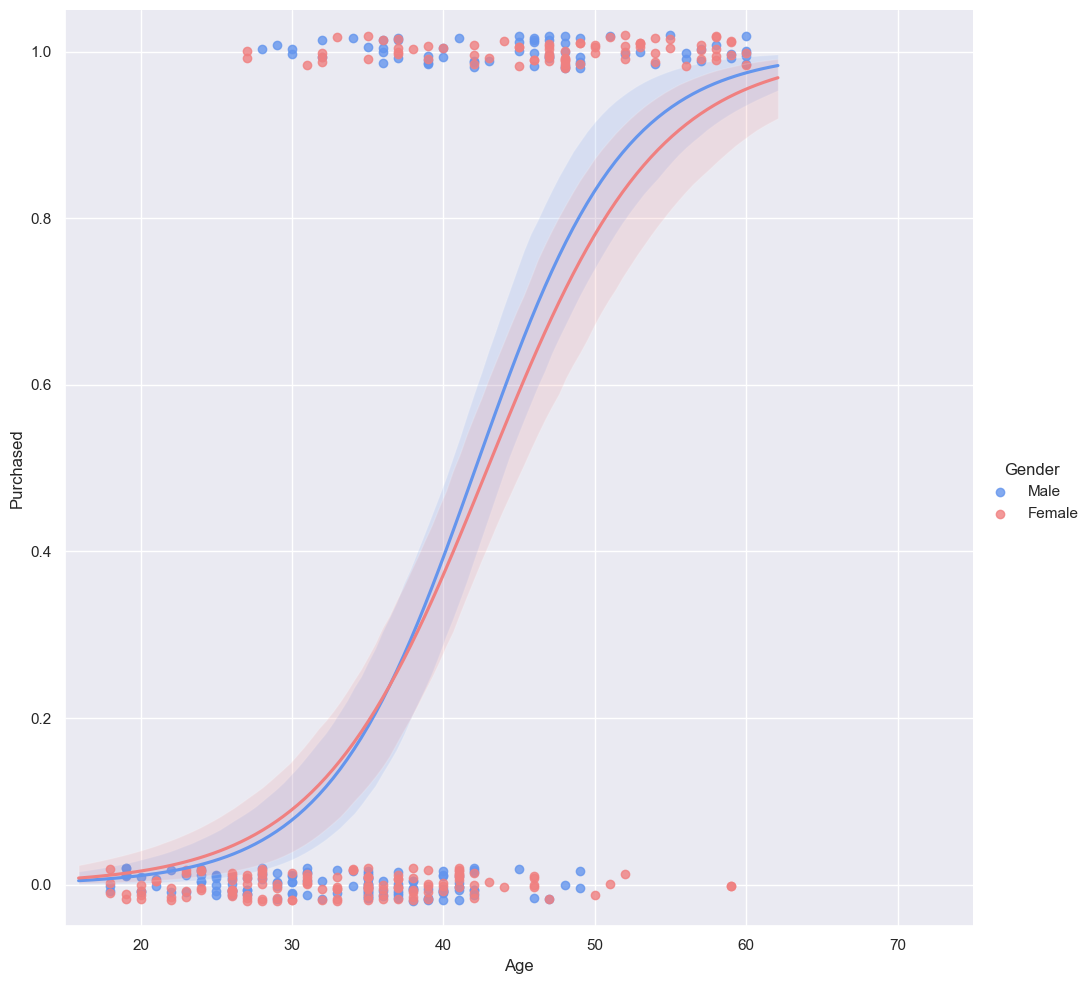

In [59]:
pal = dict(Male="#6495ED", Female="#F08080")
g = sns.lmplot(x="Age", y="Purchased", hue="Gender", data=Q2_Data,
               palette=pal, y_jitter=.02, logistic=True, truncate=False, height=10)

g.set(xlim=(15, 75), ylim=(-.05, 1.05))
plt.show()

### Q6:

#### Plot A - Interaction should be included, as there are clear differences in the slopes for the categorical variables, and have intercepts to the left end, so there is some impact due to interaction. 
#### Plot B - Interaction should be included, as there are clear differences in the slopes for the categorical variables, and have intercepts to the right end,  so there is some impact due to interaction. 
#### Plot C - Interaction should not be included, as it seems there is no difference in slopes. Lines are parallel.  All these lines are just displaced by some value, which can be easily estimated through individiual co-efficient and interactions will not be required.